### Derek Graves
### 07/16/2024
### Lab 4: Buliding a Regression Model 

# Lab 4 – Doing regression.
Here is what we will do:
1. Prepare the data
2. Train and analyze a linear regression
- single input feature
- multiple input features
3. Train and analyze a polynomial regression
4. Train and analyze a regularized model

### Prepare the data

In [107]:
# third cell -
import pandas as pd
import numpy as np

howell_full = pd.read_csv("Howell.csv", sep=";")

# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)

new_feature= bmi(howell_full['height'], howell_full['weight'])
howell_full['bmi'] = new_feature
howell_full.head(n=10)

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'
    
vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

howell_full['bmi class'].value_counts()

bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

### A Better Plot

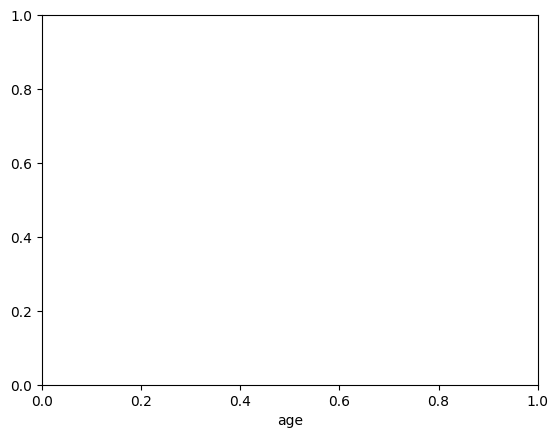

In [108]:
import matplotlib.pyplot as plt

height = howell_full['height']
age = howell_full['age']
gender = howell_full['male']

#plt.scatter(age, height, c=gender)
plt.xlabel('age')
#plt.ylabel('height(cm)')
plt.show()

### Train/Test Data Split

In [109]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split (howell_full, test_size=0.2, random_state=123)

print('Train size: ', len(train_set), 'Test size: ', len(test_set))

# Count male and female in each DataFrame
adult_counts = howell_full['male'].value_counts()
train_counts = train_set['male'].value_counts()
test_counts = test_set['male'].value_counts()

# Compute ratios
adult_ratio = adult_counts[1] / adult_counts[0]
train_ratio = train_counts[1] / train_counts[0]
test_ratio = test_counts[1] / test_counts[0]


Train size:  435 Test size:  109


### Train and evaluate a Linear Regression Model 


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']

X_test = test_set[['height']]
y_test = test_set['weight']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -34.33484184267892
 Coefficients [0.50625269]
 Score 0.8892970528522413
MAE is  3.986801374333733
RMSE is  4.901419255121661
MSE is  24.02391071447738
R^2  0.8892970528522413

Results for linear regression on test data
MAE is  4.268058841968444
RMSE is  5.308233145876227
MSE is  28.177339130979025
R^2  0.8677460846087206


### Plot linear regression model
Using height to predict weight 

c:\Users\derek\OneDrive\Documents\Machine Learning\Week 4\ml-jupyterlab4-regression\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


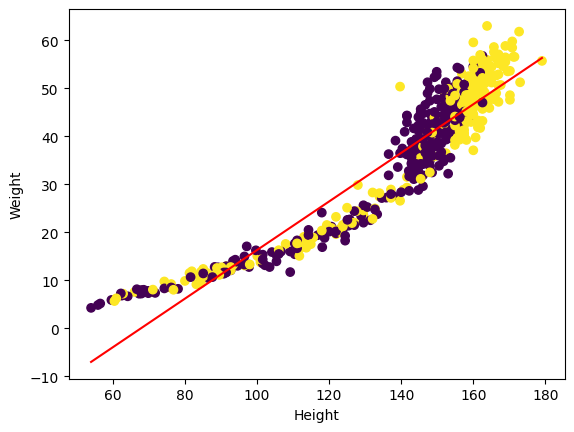

In [111]:
import matplotlib.pyplot as plt

# Assuming howell_full is the dataframe with the data
height = howell_full['height']
weight = howell_full['weight']
gender = howell_full['male']  # This is used for coloring the scatter plot

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height) / (points - 1)

x_values = [min_height + i * step_by for i in range(points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

# Scatter plot of the actual data points
plt.scatter(height, weight, c=gender)

# Set the correct labels
plt.xlabel('Height')
plt.ylabel('Weight')

#Regression line
plt.plot(x_values, y_values, c='red')

# Display the plot
plt.show()


### Add a Feature to the Model

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height', 'age']]
y = train_set['weight']

X_test = test_set[['height', 'age']]
y_test = test_set['weight']

lrTwoInput_model = LinearRegression()
lrTwoInput_model.fit(X,y)

y_pred = lrTwoInput_model.predict(X)
print('Results for linear regression on training data')
print('Input: Height, age')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lrTwoInput_model.intercept_)
print(' Coefficients', lrTwoInput_model.coef_)
print(' Score', lrTwoInput_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lrTwoInput_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('Input: Height, age')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Input: Height, age
 Default settings
Internal parameters:
 Bias is  -32.981786351678274
 Coefficients [0.48959129 0.03198353]
 Score 0.8903963296817052
MAE is  3.9844579179380495
RMSE is  4.877023070139708
MSE is  23.78535402667494
R^2  0.8903963296817052

Results for linear regression on test data
Input: Height, age
MAE is  4.1967168519461024
RMSE is  5.183466125624854
MSE is  26.868321075500337
R^2  0.8738901268956872


### Use Polynomial Regression

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  30.632150668554452
 Coefficients [-1.05825235e-06 -5.77555995e-05 -1.70151548e-03  6.23669326e-05
 -9.32833185e-07  7.00950140e-09 -2.62051349e-11  3.88237018e-14]
 Score 0.9379323667737994
MAE is  2.6922506789766354
RMSE is  3.670074275700648
MSE is  13.469445189159636
R^2  0.9379323667737994

Results for linear regression on test data
MAE is  3.1026187186322485
RMSE is  4.257704369253435
MSE is  18.128046495959794
R^2  0.9149137143027832


### Elastic Net Graph

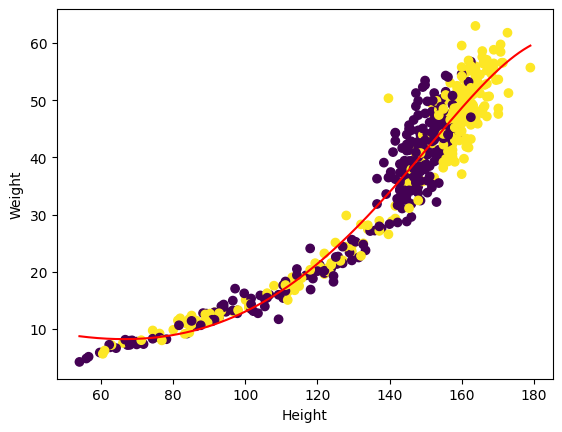

In [114]:
import matplotlib.pyplot as plt

# Assuming howell_full is the dataframe with the data
height = howell_full['height']
weight = howell_full['weight']
gender = howell_full['male']  # This is used for coloring the scatter plot

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height) / (points - 1)

x_values = [min_height + i * step_by for i in range(points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = reg_lr_model.predict(inputs_poly)

# Scatter plot of the actual data points
plt.scatter(height, weight, c=gender)

# Set the correct labels
plt.xlabel('Height')
plt.ylabel('Weight')

#Regression line
plt.plot(x_values, y_values, c='red')

# Display the plot
plt.show()

### Polynomial Regress Graph

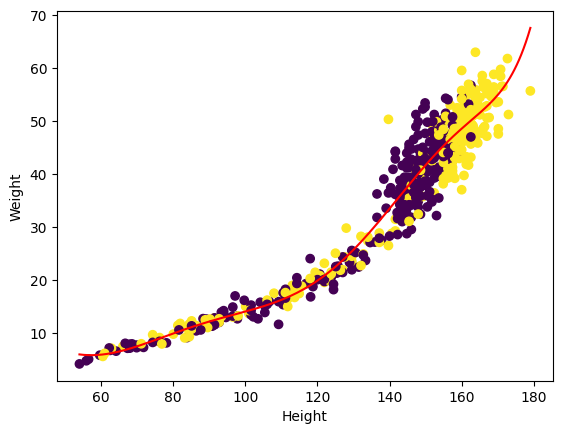

In [115]:
import matplotlib.pyplot as plt

# Assuming howell_full is the dataframe with the data
height = howell_full['height']
weight = howell_full['weight']
gender = howell_full['male']  # This is used for coloring the scatter plot

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height) / (points - 1)

x_values = [min_height + i * step_by for i in range(points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)

# Scatter plot of the actual data points
plt.scatter(height, weight, c=gender)

# Set the correct labels
plt.xlabel('Height')
plt.ylabel('Weight')

#Regression line
plt.plot(x_values, y_values, c='red')

# Display the plot
plt.show()

### Elastic Net with Poly Features

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  18.84611340392235
 Coefficients [-2.55756771e-01  6.87204298e-04  8.52528900e-06  3.67563933e-08
  1.17760939e-10  1.01431642e-13 -2.55533600e-15 -3.04757085e-17]
 Score 0.9349092303329695
MAE is  2.8731176934054687
RMSE is  3.7583910442959536
MSE is  14.125503241844028
R^2  0.9349092303329695

Results for elastic net on test data
MAE is  3.22521871336981
RMSE is  4.21639506222705
MSE is  17.77798732077265
R^2  0.9165567614450963


c:\Users\derek\OneDrive\Documents\Machine Learning\Week 4\ml-jupyterlab4-regression\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


# Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|4.90|88.93|
|Linear Regression|Height|Test|5.31|86.77|
|Linear Regression|Height,Age|Training|4.88|89.04|
|Linear Regression|Height,Age|Test|5.18|87.39|
|Polynomial Regression degree 3|Height|Training|3.82|93.28|
|Polynomial Regression degree 3|Height|Test|4.31|91.30|
|Polynomial Regression degree 8|Height|Training|3.67|93.79|
|Polynomial Regression degree 8|Height|Test|4.26|91.50|
|Elastic Net degree 8|Height|Training|3.76|93.49|
|Elastic Net degree 8|Height|Test|4.22|91.66|